# California Housing Prices dataset
Using StarLib data, predict the average house price by district.

From Hands-On Machine Learning (ch 2)

In [76]:
import os
import tarfile
import urllib.request
import pandas as pd
import numpy as np


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [77]:
if (not os.path.isfile(os.path.join(HOUSING_PATH, "housing.csv"))):
    fetch_housing_data()

In [78]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [79]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [80]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [81]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [82]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


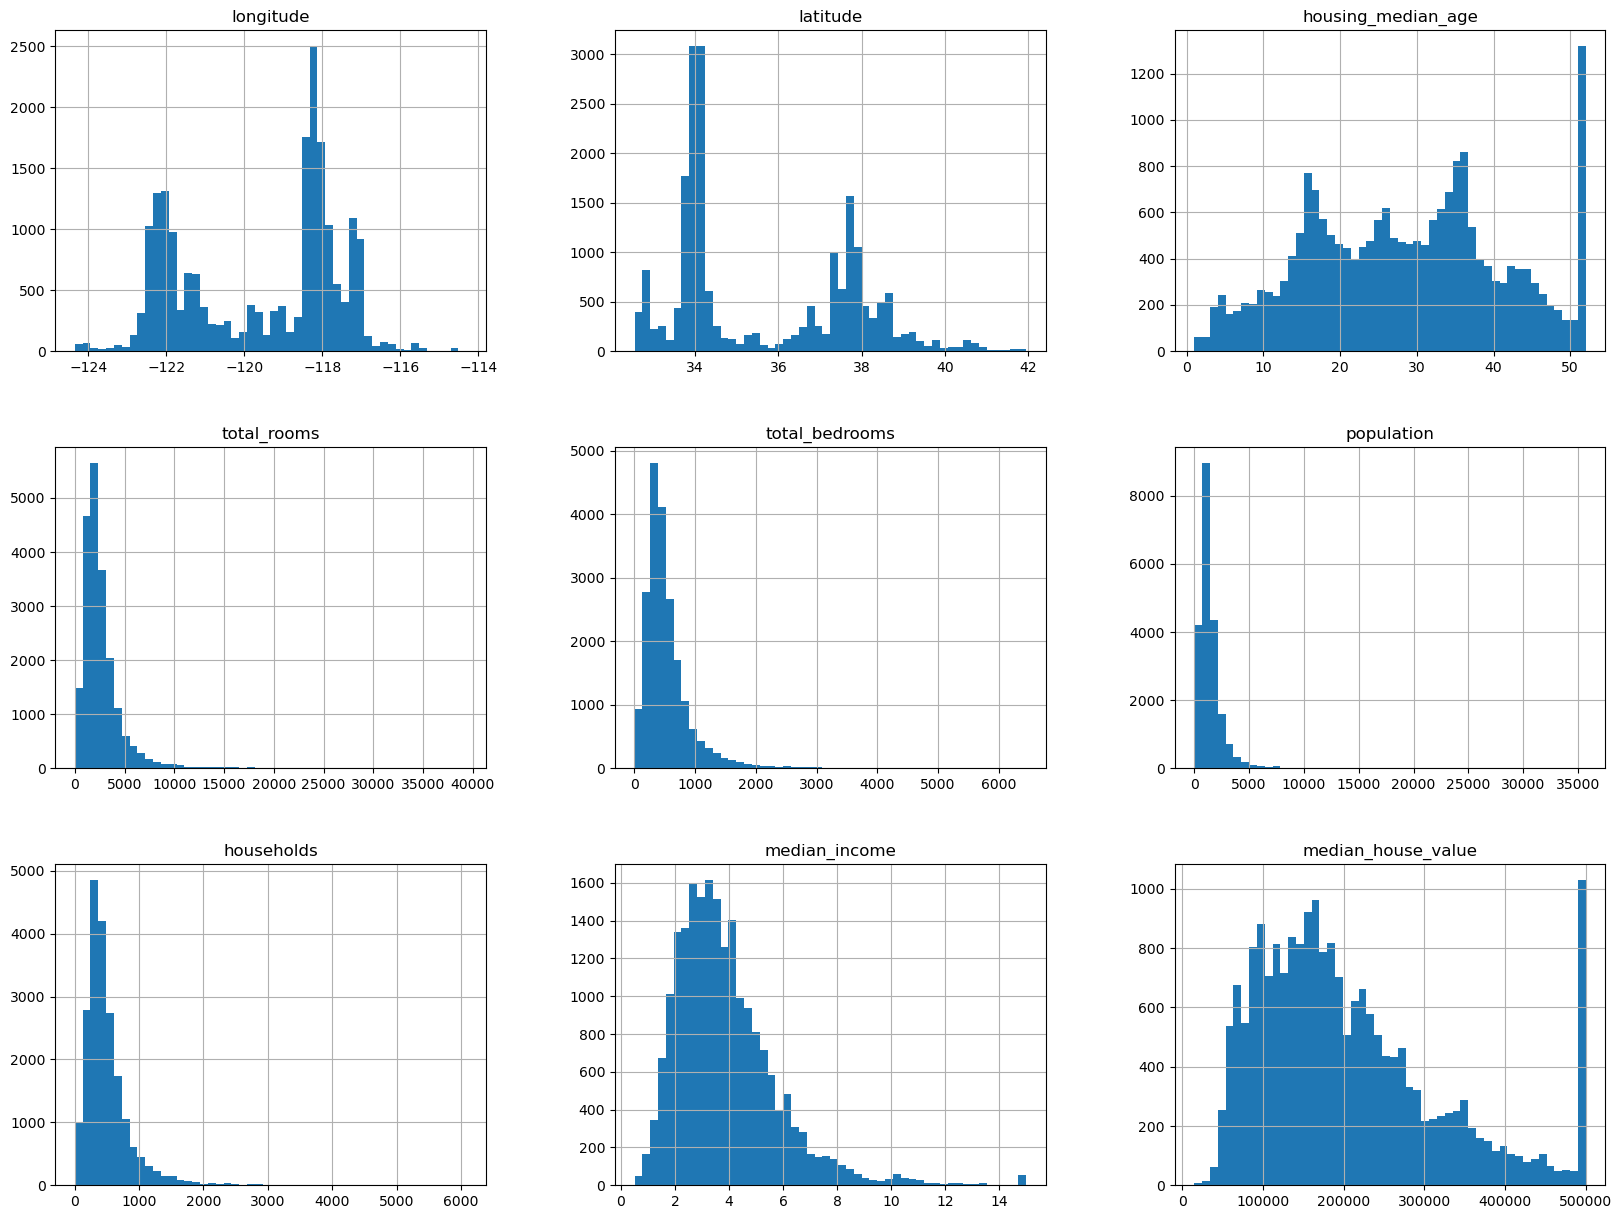

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [84]:
# randomly split test/train sets

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=5)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


<AxesSubplot:>

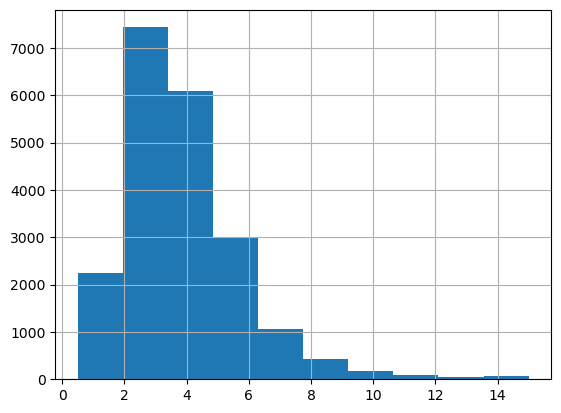

In [85]:
housing["median_income"].hist()

In [86]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

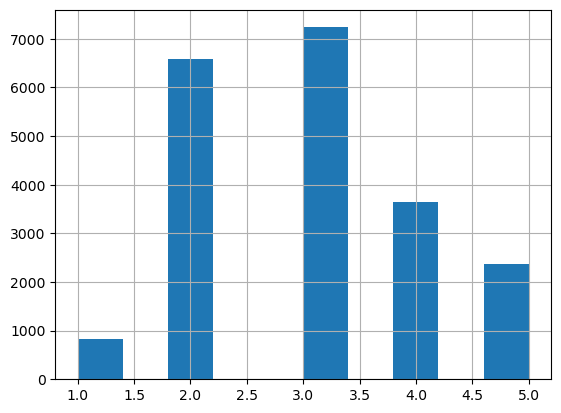

In [87]:
housing["income_cat"].hist()

In [88]:
# becuse the median income is likely an important feature
# split the test/train data with samples relative to the spread of income
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [89]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [90]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [91]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

# recreate train/test set with income_cat
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=5)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.039971,0.364964,0.364964
2,0.318847,0.318798,0.313711,-1.610697,-0.015195
3,0.350581,0.350533,0.367248,4.754008,-0.013820
4,0.176308,0.176357,0.163275,-7.392141,0.027480
5,0.114438,0.114341,0.115795,1.185436,-0.084674


In [92]:
# remove income_cat from train/test data 
# because we don't need it any more
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Explore and visualise the data

In [93]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

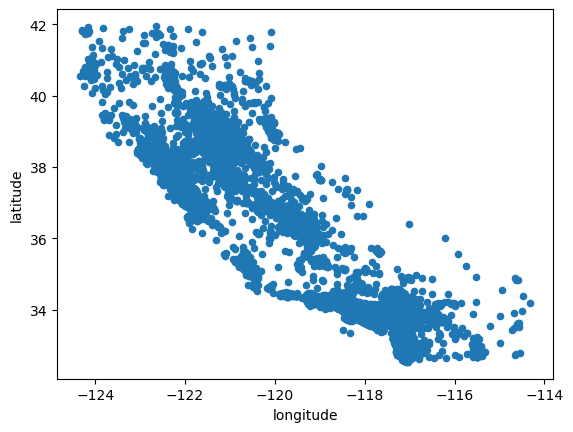

In [94]:
#plot the long/lat coordinates to see the geographical distribution
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

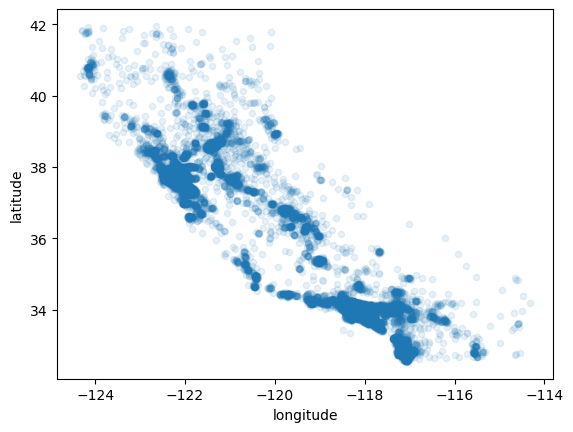

In [95]:
#let's get an idea of the density
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

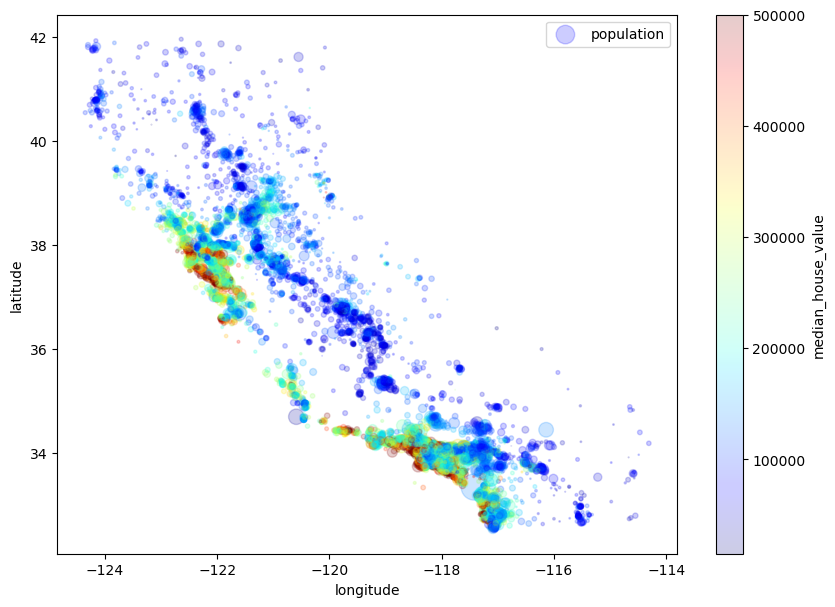

In [96]:
# include the prices
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [97]:
# Download the California image
images_path = "images"
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('images/california.png', <http.client.HTTPMessage at 0x7f27a5bce3a0>)

/tmp/ipykernel_183074/3296439039.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


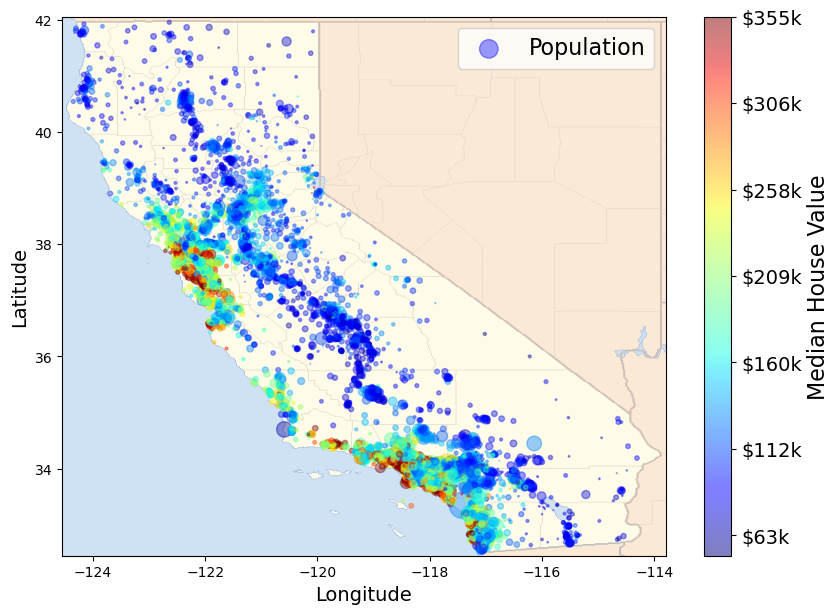

In [98]:
import matplotlib.image as mpimg
california_img=mpimg.imread('./images/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [99]:
# let's look for correlations between attributes
# 1 positively correlated, -1 negatively correlated, 0 uncorrelated
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

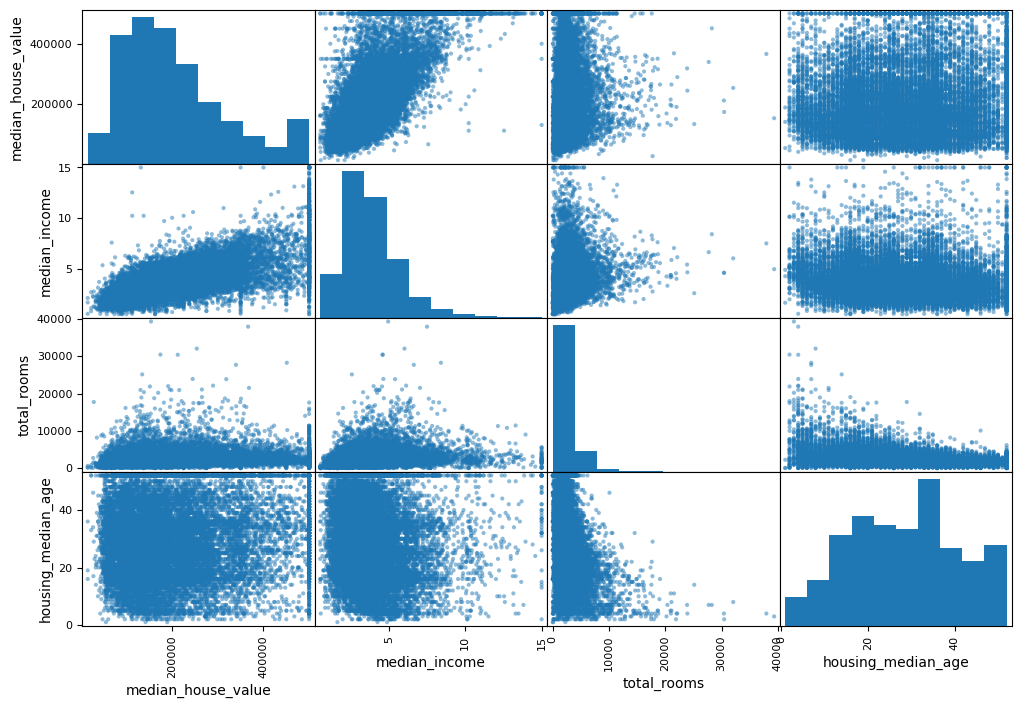

In [100]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

(0.0, 12.0, 0.0, 550000.0)

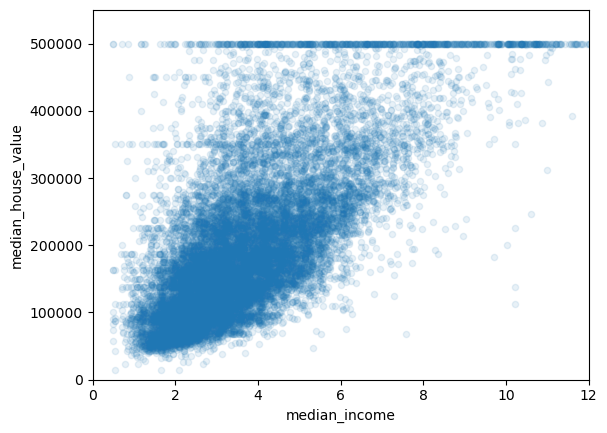

In [101]:
# median income vs median houe value
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 12, 0, 550000])

Removing the districts associated with the 3 lines above may improve the model

(0.0, 12.0, 0.0, 550000.0)

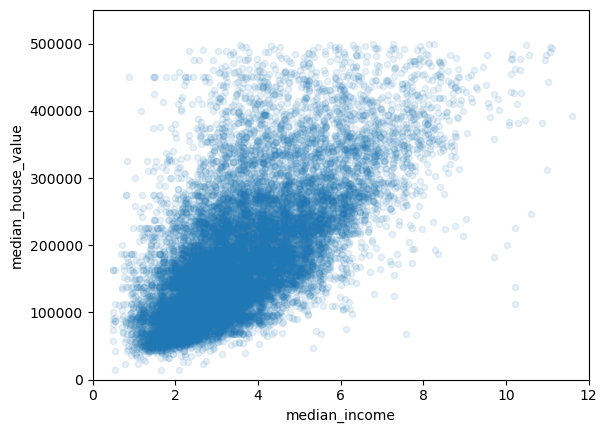

In [102]:
# let's drop the houses with a median_house_value of 500000 and try again
housing = housing.drop(housing.loc[(housing.median_house_value >= 500000) | (housing.median_house_value == 350000)].index)

# median income vs median houe value
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 12, 0, 550000])

In [103]:
# create new attributes
# rooms per district isn't very useful, so rooms per house in a given district is better
#likewise population per house.
# bedrooms per room gives some idea of the density
# i've also added bedrooms per house

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["bedrooms_per_household"] = housing["total_bedrooms"]/housing["households"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [104]:
# let's look at the correlation witht these new attributes
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.651700
total_rooms                 0.149770
rooms_per_household         0.110292
households                  0.098413
total_bedrooms              0.076883
housing_median_age          0.068584
population                  0.014647
population_per_household   -0.025164
longitude                  -0.040212
bedrooms_per_household     -0.059913
latitude                   -0.153346
bedrooms_per_room          -0.238131
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='bedrooms_per_household', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='bedrooms_per_household', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='rooms_per_household'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='bedrooms_per_room'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='bedrooms_per_room'>,
        <AxesS

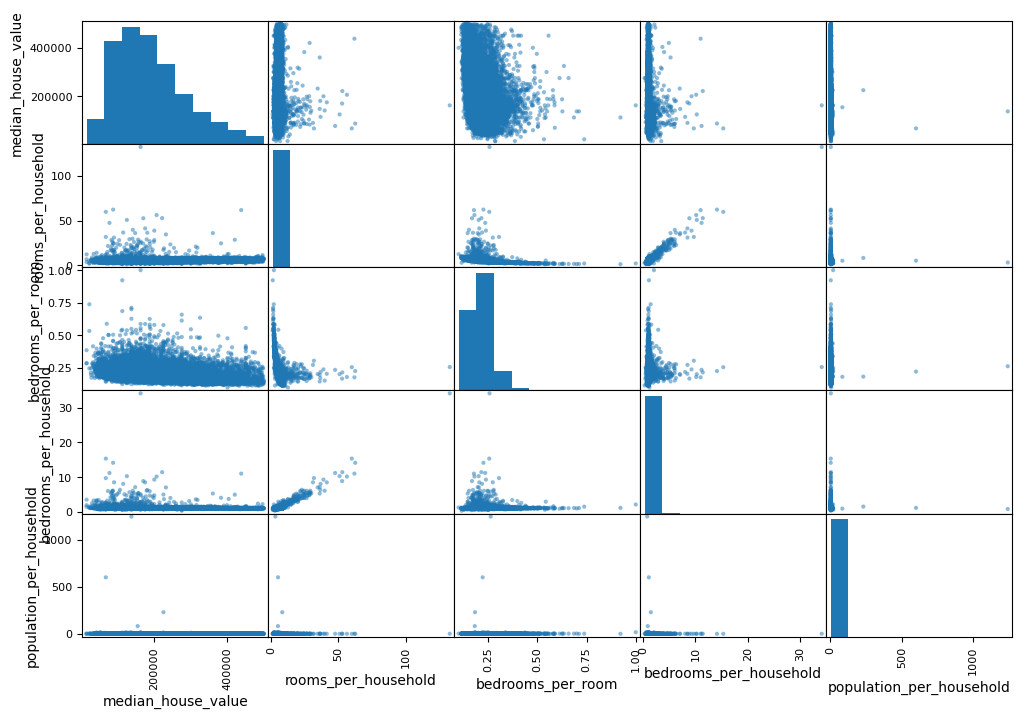

In [105]:
# do the new features correlate

attributes = ["median_house_value", "rooms_per_household", "bedrooms_per_room",
              "bedrooms_per_household", "population_per_household"]
scatter_matrix(housing[attributes], figsize=(12, 8))

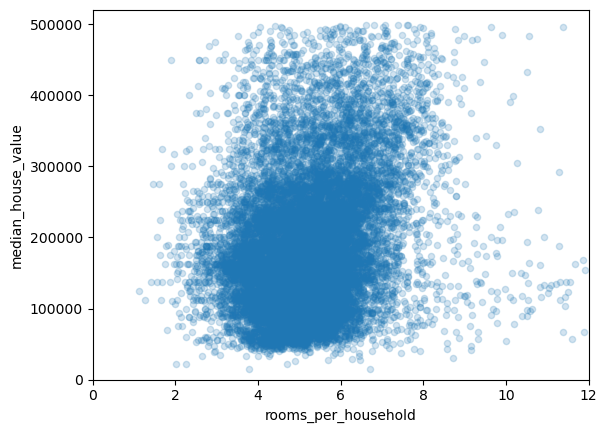

In [106]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 12, 0, 520000])
plt.show()

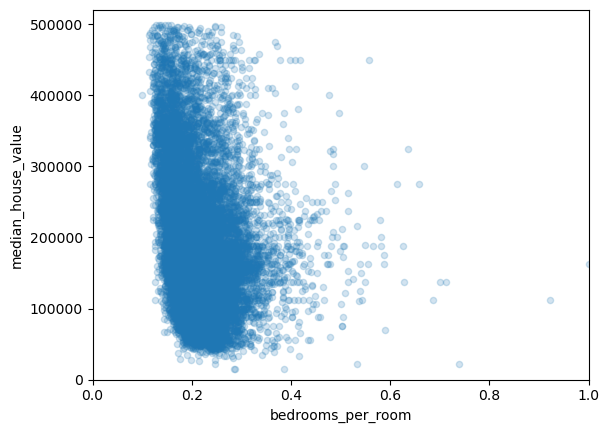

In [107]:
housing.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value",
             alpha=0.2)
plt.axis([0, 1, 0, 520000])
plt.show()

In [108]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,bedrooms_per_household,population_per_household
count,15638.000000,15638.000000,15638.000000,15638.000000,15485.000000,15638.000000,15638.000000,15638.000000,15638.000000,15638.000000,15485.000000,15485.000000,15638.000000
mean,-119.561880,35.656137,28.342691,2610.994628,537.344656,1437.505244,499.291086,3.678430,191253.427356,5.373725,0.214474,1.098428,3.094086
std,2.002863,2.153784,12.475489,2140.804344,415.067310,1127.517906,377.892944,1.567024,96749.728186,2.397707,0.055632,0.483739,11.207814
min,-124.350000,32.540000,1.000000,6.000000,2.000000,8.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.333333,0.692308
25%,-121.750000,33.930000,18.000000,1437.000000,296.000000,795.000000,281.000000,2.535325,116300.000000,4.422643,0.177534,1.005525,2.449061
50%,-118.520000,34.270000,28.000000,2105.000000,435.000000,1179.000000,410.000000,3.454400,172550.000000,5.192669,0.204362,1.048421,2.839702
75%,-118.000000,37.730000,37.000000,3116.750000,647.000000,1742.000000,603.000000,4.582175,245600.000000,5.975085,0.240592,1.098646,3.305810
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,499100.000000,132.533333,1.000000,34.066667,1243.333333


# Prepare the data for ML

In [109]:
# first let's revert back to clean data and seperate the target values

strat_train_set = strat_train_set.drop(strat_train_set.loc[(strat_train_set.median_house_value >= 500000) | (strat_train_set.median_house_value == 350000)].index)
strat_train_set.loc[strat_train_set['ocean_proximity'] != "INLAND", 'ocean_proximity'] = "NOT_INLAND"

housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [110]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NOT_INLAND
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,NOT_INLAND
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,NOT_INLAND
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,NOT_INLAND
13069,-121.30,38.58,16.0,1537.0,NaN,1125.0,375.0,2.6471,INLAND


In [111]:
# replace missing values with median values (and save the median values for later use)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
# we can't impute median values of non-numeric values, so make a copy first
housing_num = housing.select_dtypes(include=[np.number])

# calculate the values
imputer.fit(housing_num)

# they're saved here
imputer.statistics_

array([-118.52  ,   34.27  ,   28.    , 2105.    ,  435.    , 1179.    ,
        410.    ,    3.4544])

In [112]:
# check they're the same 
housing_num.median().values

array([-118.52  ,   34.27  ,   28.    , 2105.    ,  435.    , 1179.    ,
        410.    ,    3.4544])

In [113]:
# the replacement is done here, and we create the training set in the process
X = imputer.transform(housing_num)

In [114]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [115]:
housing_tr.loc[sample_incomplete_rows.index.values]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,435.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,435.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,435.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,435.0,835.0,294.0,4.2891
13069,-121.30,38.58,16.0,1537.0,435.0,1125.0,375.0,2.6471


In [116]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [117]:
# we have 1 categorical input to deal with
housing_cat = housing[['ocean_proximity']].copy()
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NOT_INLAND
2908,INLAND
14053,NOT_INLAND
20496,NOT_INLAND
1481,NOT_INLAND
18125,NOT_INLAND
5830,NOT_INLAND
17989,NOT_INLAND
20615,INLAND


In [118]:
# later we learn that only INLAND is really relevent, so let's convert ocean_proximity to 2 categories
housing_cat.loc[housing_cat['ocean_proximity'] != "INLAND", 'ocean_proximity'] = "NOT_INLAND"
housing_cat['ocean_proximity'].value_counts()

NOT_INLAND    10403
INLAND         5235
Name: ocean_proximity, dtype: int64

In [119]:
# the ocean proximity is an ordinal, the distance matters (based on the maps above)
# although we're not doing much with the order here
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]])

In [120]:
ordinal_encoder.categories_

[array(['INLAND', 'NOT_INLAND'], dtype=object)]

In [121]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False) # for a dense array
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [122]:
cat_encoder.categories_


[array(['INLAND', 'NOT_INLAND'], dtype=object)]

In [123]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [124]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [125]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NOT_INLAND,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NOT_INLAND,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,NOT_INLAND,6.096552,3.167241


In [126]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-0.94773381,  1.32973186,  0.05268973, ...,  0.04675891,
         0.00664459, -0.14862109],
       [ 1.16431078, -1.19149347, -1.71082464, ...,  0.64787226,
        -0.04197102, -0.84944734],
       [ 0.26057539, -0.13285742,  1.2550859 , ...,  0.00817816,
        -0.07769408, -0.36926046],
       ...,
       [-1.57685347,  1.29258673,  1.57572487, ..., -0.52687855,
        -0.03848292,  0.30250296],
       [-1.56686744,  1.23222591, -1.14970643, ...,  0.38524707,
        -0.06093342, -0.48991845],
       [-1.2872587 ,  2.00298724, -0.10762976, ...,  0.04313936,
         0.00700449, -0.14920528]])

In [127]:
# one hot encode the categorical attributes, in a pipeline
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-0.94773381,  1.32973186,  0.05268973, ..., -0.14862109,
         1.        ,  0.        ],
       [ 1.16431078, -1.19149347, -1.71082464, ..., -0.84944734,
         0.        ,  1.        ],
       [ 0.26057539, -0.13285742,  1.2550859 , ..., -0.36926046,
         1.        ,  0.        ],
       ...,
       [-1.57685347,  1.29258673,  1.57572487, ...,  0.30250296,
         0.        ,  1.        ],
       [-1.56686744,  1.23222591, -1.14970643, ..., -0.48991845,
         0.        ,  1.        ],
       [-1.2872587 ,  2.00298724, -0.10762976, ..., -0.14920528,
         1.        ,  0.        ]])

# Let's do some training

In [128]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [129]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
# actual values
print("Labels:", list(some_labels))

Predictions: [ 86727.49435125 294991.79524294 144297.40186746 172243.94672689
 237544.16886259]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [130]:
# it works, but isn't too accurate
# let's check the RMSE
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

59428.924812604826

In [131]:
# and the MAE
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

43559.36796827442

It's not a great model, so let's try another

In [132]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [133]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [134]:
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

0.0

no errors, so it's overfitting.

In [135]:
# lets take a look at k-fold cross validation using the decision tree
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [136]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [61221.36754426 61806.47287715 64036.95656624 62859.80629193
 62443.91076549 65863.09820077 63492.15590837 60820.88388769
 62500.77631457 64844.2166337 ]
Mean: 62988.96449901874
Standard deviation: 1510.941629315613


In [137]:
# and now k-fold cross validation with the linear regression model
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [60320.63583095 56143.608013   59126.84998668 60620.43664283
 58994.07103283 62106.76938598 64549.9066892  61418.71494548
 55380.4594962  58889.92974105]
Mean: 59755.13817641993
Standard deviation: 2574.0922612889253


In [138]:
# ok, how about with a random forest ensemble?
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

20029.157567997412

In [139]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [46322.91189284 46246.51574087 46483.77531697 49159.56069733
 46427.05433632 48267.15234957 48800.0527647  48192.72261192
 44514.15156881 47909.56923347]
Mean: 47232.346651279644
Standard deviation: 1379.1303458116358


## Tuning hyperparameters

In [140]:
# hunt for hyperparameter values with Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [50, 60, 70], 'max_features': [6, 8, 10]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [60, 70], 'max_features': [6, 8, 10]},
]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [6, 8, 10],
                          'n_estimators': [50, 60, 70]},
                         {'bootstrap': [False], 'max_features': [6, 8, 10],
                          'n_estimators': [60, 70]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [141]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 70}

In [142]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=6, n_estimators=70,
                      random_state=42)

In [143]:
cvres = grid_search.cv_results_
results = list(zip(cvres["mean_test_score"], cvres["params"]))
results.sort(key=lambda tup: tup[0], reverse=True)
for mean_score, params in results[:5]:
    print(np.sqrt(-mean_score), params)

44072.964062834915 {'bootstrap': False, 'max_features': 6, 'n_estimators': 70}
44092.72439198581 {'bootstrap': False, 'max_features': 6, 'n_estimators': 60}
44334.68483425442 {'bootstrap': False, 'max_features': 8, 'n_estimators': 70}
44351.05395810397 {'bootstrap': False, 'max_features': 8, 'n_estimators': 60}
44499.62345633441 {'max_features': 8, 'n_estimators': 70}


In [144]:
# as well as grid search, we can also try randomised search to identify hyperparameter values
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=50, high=100),
    'max_features': randint(low=5, high=11),
    'bootstrap': [False, True]
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [False, True],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f27a5c49790>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f27a5509970>},
                   random_state=42, scoring='neg_mean_squared_error')

In [145]:
cvres = rnd_search.cv_results_
results = list(zip(cvres["mean_test_score"], cvres["params"]))
results.sort(key=lambda tup: tup[0], reverse=True)
for mean_score, params in results[:5]:
    print(np.sqrt(-mean_score), params)

44069.65845239943 {'bootstrap': False, 'max_features': 6, 'n_estimators': 73}
44196.5947470506 {'bootstrap': False, 'max_features': 7, 'n_estimators': 73}
44267.87037808449 {'bootstrap': False, 'max_features': 7, 'n_estimators': 57}
44282.36554988365 {'bootstrap': False, 'max_features': 8, 'n_estimators': 89}
44333.33346613915 {'bootstrap': False, 'max_features': 8, 'n_estimators': 78}


# Ensemble methods

In [146]:
# let's analyse the best models so far
feature_importances = grid_search.best_estimator_.feature_importances_

extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room", "bedrooms_per_household"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3220149627895839, 'median_income'),
 (0.10568807610551317, 'INLAND'),
 (0.101697998590729, 'population_per_household'),
 (0.09409599435043964, 'bedrooms_per_household'),
 (0.08693488742244687, 'longitude'),
 (0.07711058696462025, 'latitude'),
 (0.0616352135722308, 'bedrooms_per_room'),
 (0.041546580188571755, 'rooms_per_household'),
 (0.04025754645990898, 'housing_median_age'),
 (0.017762372199013353, 'total_bedrooms'),
 (0.017507239318646804, 'total_rooms'),
 (0.017069679555412918, 'population'),
 (0.016678862482882698, 'households')]

In [147]:
final_model = grid_search.best_estimator_

strat_test_set = strat_test_set.drop(strat_test_set.loc[(strat_test_set.median_house_value >= 500000) | (strat_test_set.median_house_value == 350000)].index)
strat_test_set.loc[strat_test_set['ocean_proximity'] != "INLAND", 'ocean_proximity'] = "NOT_INLAND"

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

43207.02461578381

In [148]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([41307.15957858, 45026.79779696])